# Question 2: Cross-validation
## How does the size of your dataset potentially impact the effectiveness of cross-validation?


Having smaller dataset means you have less number folds you can create for validation.
For example having n=25 you will only have 25 possible folds, this limits the amount of bias/variance balanced folds you can pick. Having only 5 n for 5 folds makes it much harder to have an effective cross validation. Smaller dataset means smaller amount of effective k-folds.

# Question 3: Backpropagation and Gradient Descent
## How does backpropagation relate to gradient descent?
## Can you explain the concepts briefly and then discuss the relationship between these two concepts ?

Back propogation is the process of changing the weight moving from the final layer in the neural network back to the input nodes. The method by which these weights are changed is gradient descent, where the model is trying to minimize the output error by adjusting the weights through the minimzing the partial derivatives. This minimizing of partial derivatives is the "gradient descent".

# Question 4: Sentiment Analysis on Product Quality
This case assignment requires an analysis of consumer sentiment to understand perceptions of product quality. 
The primary objective is to utilize sentiment analysis techniques on the posted Reviews dataset to extract and analyze consumer sentiments (variable "Score"). This analysis will provide actionable insights into how quality perceptions can influence consumer acceptance and preference, directly tying into the strategic considerations of companies selling such products.

# Question 5: Text Analysis with Basic Decision Tree

Build a basic decision tree (CART) classification model to predict the "Score" variable without any hyperparameter tuning of the decision tree. Use a binary Document-Term Matrix to model the "Text" variable only.

Copy/paste the source code below. (Also submit the complete source code file at the end of this case.)

In [13]:
import pandas as pd 

# Read in the data 
df = pd.read_csv("Reviews.csv")
df.head()
# Embbed the documents using the binary document term matrix 
texts = "".join(df["Text"])
words = texts.split(" ")
texts_no_prefix = [i.removeprefix(' ') for i in words]
texts_no_suffix = [k.removesuffix(' ') for k in texts_no_prefix]
# Remove out text that is not alphabetical 
all_alpha = [x for x in texts_no_suffix if x.isalpha() is True]
# Remove text that is less 
two_or_more = [y for y in all_alpha if len(y) > 1]
corpus = list(set(two_or_more))

# Create the embedding
vectors = []
for i in df["Text"]:
    vector = []
    for k in corpus:
        if k in i:
            vector.append(1)
        else:
            vector.append(0)
    vectors.append(vector)

In [14]:
import numpy as np 
from sklearn import tree
from sklearn.model_selection import train_test_split
from dmba import classificationSummary

# Implement decision tree classifier
X, y = np.array(vectors), np.array(df["Score"])

X_train, X_test, y_train, y_test = train_test_split(X, y,
stratify=y, test_size=0.7, random_state=42)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)
classificationSummary(y_test, clf.predict(X_test))

Confusion Matrix (Accuracy 0.4712)

       Prediction
Actual   0   1   2   3   4
     0   1   5   4   4  22
     1   4   0   0   2  15
     2   3   9   0   0  18
     3  10   2   3   4  38
     4  15  22  12  23 183


In [9]:
"""
Attempt to split using custom data
"""
X = np.array([[22, "L"], 
              [25, "L"], 
              [28, "M"], 
              [30, "M"], 
              [35, "H"], 
              [40, "H"]])
y = np.array([[0], 
              [0], 
              [1], 
              [1], 
              [1], 
              [1]])
X = pd.DataFrame(X, columns=["Age", "Income"]).drop(columns=["Age"])
X = pd.get_dummies(X)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

# Question 6: Feature Importance!?

"Manually", take the three tokens in the decision nodes at the top of the decision tree (the root and two children of the root), and hard-code them into a Python list. Identify in how many documents these tokens occur.

Do you see any relationship between their importance (i.e., where they occur in the tree) and their document frequency (i.e., in how many different documents they occur)?

First, state your answer, and then copy/paste the source code below. (Also submit the complete source code file at the end of this case.)

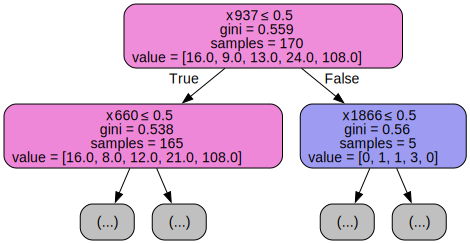

In [17]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    clf,
    out_file=None,
    filled=True,
    feature_names = None,
    rounded=True,
    special_characters=True,
    max_depth=1   # Change the depth here
)
graph = graphviz.Source(dot_data)
graph